In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

In [3]:
# 2. Đọc file csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VMD.csv')
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

data

,Unnamed: 0,time,open,high,low,close,volume,ticker
0,0,2014-01-02,5980,6240,5980,6240,50,VMD
1,1,2014-01-03,6240,6240,6240,6240,100,VMD
2,2,2014-01-06,6340,6340,6340,6340,860,VMD
3,3,2014-01-07,6340,6340,6340,6340,0,VMD
4,4,2014-01-08,6090,6340,6090,6340,200,VMD
...,...,...,...,...,...,...,...,...
2472,2472,2023-12-04,20300,20300,19700,20300,238300,VMD
2473,2473,2023-12-05,20300,20900,19750,19900,62700,VMD
2474,2474,2023-12-06,20300,20600,20100,20150,51500,VMD
2475,2475,2023-12-07,20150,20300,20000,20150,41100,VMD


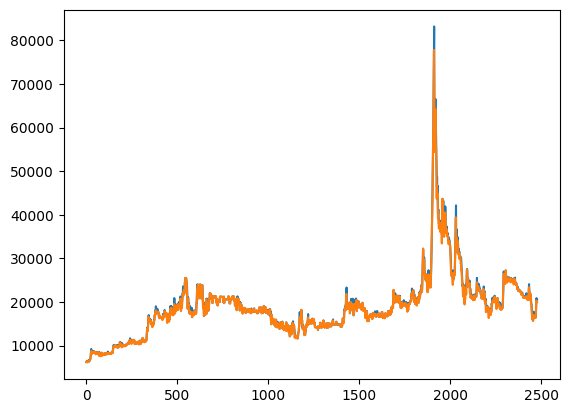

In [4]:
# 3. Gán biến
y = data[['close']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = data[['high']] # các biến độc lập

plt.plot(X)
plt.plot(y)
plt.show()

In [5]:
# 4. Chia train, test
train_size = int(0.6 * len(data))
test_size = int(0.3 * len(data))
val_size = len(data) - train_size - test_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:train_size+test_size]
X_test = X[train_size:train_size+test_size]
y_val = y[train_size+test_size:]
X_val = X[train_size+test_size:]

In [6]:
# 5. Tạo mô hình SVR
svr_RBF = SVR(kernel='rbf', C=1000)
svr_RBF.fit(X_train, y_train)


SVR(C=1000)

In [7]:
# 6. Dự đoán giá đóng cửa trên tập kiểm tra
y_pred_RBF = svr_RBF.predict(X_test)
y_pred_RBF = y_pred_RBF.reshape(-1,1)
# Tập validate
y_pred_val_RBF= svr_RBF.predict(X_val)
y_pred_val_RBF = y_pred_val_RBF.reshape(-1,1)



In [8]:
# 7. Tính toán độ chính xác của mô hình
# Test
mae_RBF = mean_absolute_error(y_test, y_pred_RBF)
mape_RBF = mean_absolute_percentage_error(y_test, y_pred_RBF) * 100
r2_RBF = r2_score(y_test, y_pred_RBF)
test_rmse_RBF = np.sqrt(np.mean((y_pred_RBF - y_test)**2))
#Validate
mae_val_RBF = mean_absolute_error(y_val, y_pred_val_RBF)
mape_val_RBF = mean_absolute_percentage_error(y_val, y_pred_val_RBF) * 100
r2_val_RBF = r2_score(y_val, y_pred_val_RBF)
val_rmse_RBF = np.sqrt(np.mean((y_pred_val_RBF - y_val)**2))


In [9]:
# 8. In kết quả độ chính xác của mô hình
print("*********TEST**********")
print("RBF MAE:", mae_RBF)
print("RBF MAPE:", mape_RBF)
print("RBF R^2:",  r2_RBF)
print("RBF RMSE:", test_rmse_RBF)
print("*********VALIDATE**********")
print("RBF MAE:", mae_val_RBF)
print("RBF MAPE:", mape_val_RBF)
print("RBF R^2:",  r2_val_RBF)
print("RBF RMSE:", val_rmse_RBF)



*********TEST**********
RBF MAE: 4997.948876197074
RBF MAPE: 12.914090328879555
RBF R^2: -0.5721070974616769
RBF RMSE: close    11438.434343
dtype: float64
*********VALIDATE**********
RBF MAE: 344.0615722923165
RBF MAPE: 1.5155073043819964
RBF R^2: 0.9527724238795301
RBF RMSE: close    593.670753
dtype: float64


In [10]:
# 9. Láy giá trị Close của ngày cuối cùng trong dataset
last_row = data.tail(1)
last_data = last_row['close'].values.reshape(-1,1)
last_index =  data.index[-1]
last_distance = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
#  Tạo mảng chứa giá trị predict của 30 ngày tiếp theo

In [11]:
# 10. Tạo mảng chứa giá trị predict của 30 ngày tiếp theo
y_next_30_day_RBF = []

# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_RBF.predict(last_data)
    y_next_30_day_RBF.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", y_next_30_day_RBF)

Kết quả dự đoán sử dụng RBF: [array([20048.72031498]), array([20047.44541491]), array([20046.17528018]), array([20044.90989123]), array([20043.6492286]), array([20042.39327285]), array([20041.14200462]), array([20039.8954046]), array([20038.65345357]), array([20037.41613234]), array([20036.1834218]), array([20034.95530289]), array([20033.73175664]), array([20032.51276412]), array([20031.29830646]), array([20030.08836487]), array([20028.88292063]), array([20027.68195506]), array([20026.48544956]), array([20025.2933856]), array([20024.1057447]), array([20022.92250846]), array([20021.74365853]), array([20020.56917665]), array([20019.3990446]), array([20018.23324425]), array([20017.0717575]), array([20015.91456636]), array([20014.76165288]), array([20013.61299918])]


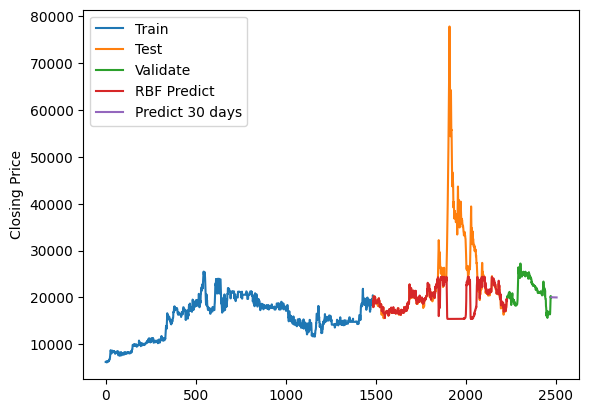

In [12]:
# 11. Vẽ mô hình
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_val, label='Validate')
plt.plot(X_test.index, y_pred_RBF, label='RBF Predict')
plt.plot(last_distance,y_next_30_day_RBF, label='Predict 30 days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()